In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df
df1 = df.drop(columns = "index", axis =1)
df1.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [3]:
df.describe()

,index,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


# Gender Distribution

In [4]:
#df = df.drop("index", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("5-Oct","5-10").head()
df

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,NaN,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,NaN,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,NaN,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,NaN,82,90,93


<Figure size 432x432 with 0 Axes>

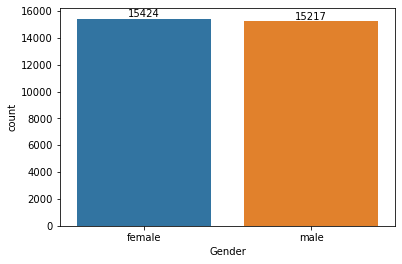

<Figure size 432x432 with 0 Axes>

In [6]:
ax= sns.countplot(data = df, x="Gender")
ax.bar_label(ax.containers[0]) #to write the number on the bar
plt.figure(figsize = (6,6))

In [7]:
#so from above bar plot we have analysed that the number of females are more than males

# Problem statement: 
#How is the studies of a child being affected due to parents eductional background?

#How is the studies of a child being affected due to parents marital background?

#How does the studies of a child being varied through weekly study hours?

#What is the overall impact of a child's score based on testprep, being a first child, and practicing sports?

In [8]:
#Answer
#we can see three columns regarding marks
#we will group by ParentEduc first with respect to these three columns

In [9]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
gb


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


In [10]:
#we can see from the above table that if a parent has a master's degree 
#their child scores more marks in math,reading and writing

Text(0.5, 1.0, 'ParentsEducation v StudentsScore')

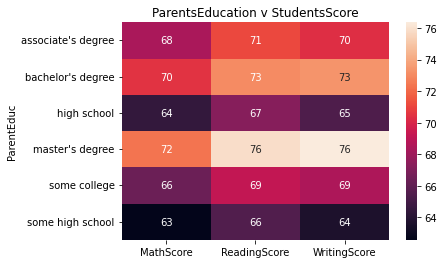

In [11]:
sns.heatmap(gb, annot = True)
plt.title("ParentsEducation v StudentsScore")

In [12]:
#we can see that how marks varies according to parents education 

In [13]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


Text(0.5, 1.0, 'Parents Marital Status v Students Score')

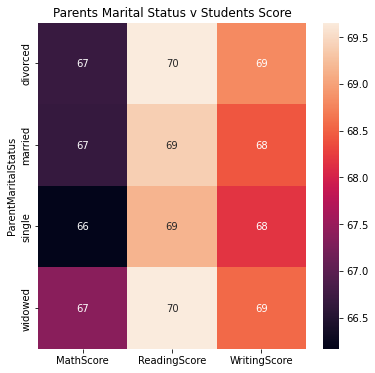

In [14]:
plt.figure(figsize = (6,6))
sns.heatmap(gb1, annot = True)
plt.title("Parents Marital Status v Students Score")

In [15]:
#from the above chart we can see that parents marital status 
#has almost negligible impact on a students marks

<AxesSubplot:xlabel='MathScore'>

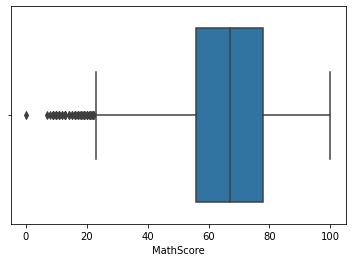

In [16]:
sns.boxplot(data = df, x="MathScore")

In [17]:
#you can see there is an outlier even at zero

<AxesSubplot:xlabel='ReadingScore'>

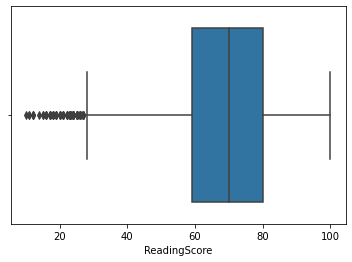

In [18]:
sns.boxplot(data = df, x="ReadingScore")

In [19]:
#you can see there is an outlier near zero

<AxesSubplot:xlabel='WritingScore'>

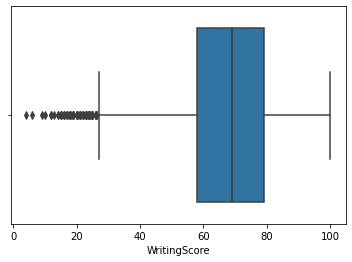

In [20]:
sns.boxplot(data = df, x="WritingScore")

In [21]:
#so after analyzing the barplot with respect to marks 
#we can note that 
#students are finding maths as harder subject than other two

# Test Score Analysis

In [22]:
df.head()

,index,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-10,76,78,75


In [23]:
gb2 = df.groupby("TestPrep").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean' })
gb2

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


<AxesSubplot:ylabel='TestPrep'>

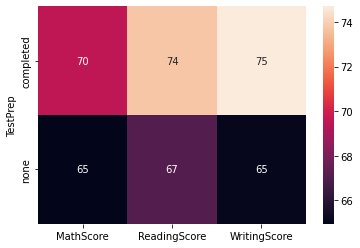

In [25]:
sns.heatmap(gb2, annot=True)

In [40]:
#we can conclude that students who are 
#not prepared for the exam have scored less marks than prepared ones

<AxesSubplot:xlabel='WklyStudyHours', ylabel='MathScore'>

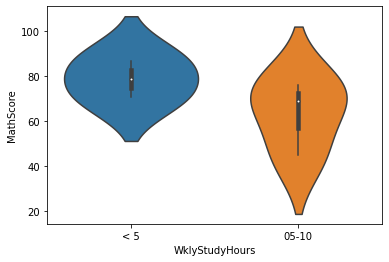

In [32]:
sns.violinplot(data=df, x="WklyStudyHours", y="MathScore")

In [ ]:
#from violinplot we can see that students who
#study between 5-10 hrs score more in maths than those who study less than 5hrs.

<Figure size 648x648 with 0 Axes>

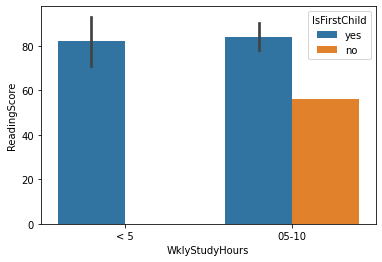

<Figure size 648x648 with 0 Axes>

In [39]:
sns.barplot(data=df, x="WklyStudyHours", y="ReadingScore", hue = "IsFirstChild")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(9,9))

In [ ]:
#we can see that first child tend to score more than their younger siblngs.

<Figure size 57600x28800 with 0 Axes>

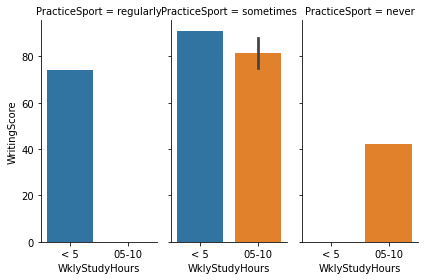

<Figure size 57600x28800 with 0 Axes>

In [51]:
sns.catplot(
    data = df, kind="bar",
    x="WklyStudyHours", y="WritingScore", col="PracticeSport",
    height=4, aspect=.5,
)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.figure(figsize = (800,400))


In [ ]:
#we can see that students who practice sports sometimes tend to score more marks in writing.